# 고객 세분화 실습

## 1. 환경 설정

### 1.1 분서에 필요한 library 호출 및 google drive 연결


In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [34]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 2. 데이터 불러오기

### 2.1 데이터 불러오기 및 확인

In [35]:
df_org = pd.read_csv('/content/drive/MyDrive/data.csv',encoding='latin')
df_org.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [36]:
df_org.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France


In [37]:
df_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [38]:
# 수치형 컬럼만 추출
numeric_cols = df_org.select_dtypes(include=['int64', 'float64']).columns

In [39]:
# 기본 요약 통계량
df_org[numeric_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.00,13953.00,15152.00,16791.00,18287.0


In [40]:
# 왜도 (Skewness), 첨도 (Kurtosis), 분산, 고유값 수, 0 이하 값 개수
additional_stats = pd.DataFrame({
    'skewness': df_org[numeric_cols].skew(),
    'kurtosis': df_org[numeric_cols].kurt(),
    'variance': df_org[numeric_cols].var(),
    'n_unique': df_org[numeric_cols].nunique(),
    'n_zeros': (df_org[numeric_cols] == 0).sum(),
    'n_negative': (df_org[numeric_cols] < 0).sum()
})

additional_stats

,skewness,kurtosis,variance,n_unique,n_zeros,n_negative
Quantity,-0.264076,119769.160031,4.755939e+04,722,0,10624
UnitPrice,186.506972,59005.719097,9.362469e+03,1630,2515,2
CustomerID,0.029835,-1.179982,2.936426e+06,4372,0,0


/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


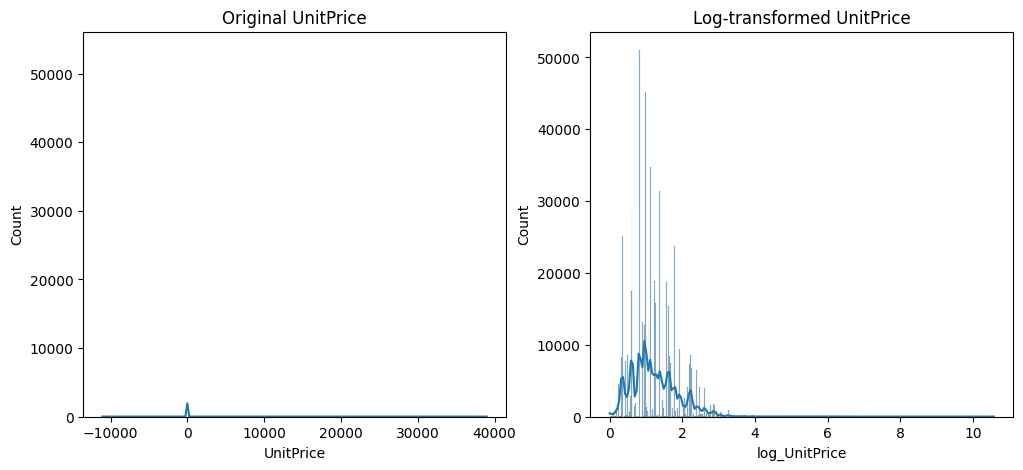

In [41]:
# 예: 로그 변환 전후 비교할 컬럼 (양수만 해당)
log_test_col = 'UnitPrice'
df_org['log_' + log_test_col] = np.log1p(df_org[log_test_col])  # log(1 + x)

# 시각적으로 확인
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df_org[log_test_col], kde=True)
plt.title(f'Original {log_test_col}')

plt.subplot(1, 2, 2)
sns.histplot(df_org["log_" + log_test_col], kde=True)
plt.title(f'Log-transformed {log_test_col}')
plt.show()

In [42]:
stats_summary = df_org[numeric_cols].describe().T
stats_summary['skewness'] = df_org[numeric_cols].skew()
stats_summary['kurtosis'] = df_org[numeric_cols].kurt()
stats_summary['n_unique'] = df_org[numeric_cols].nunique()
stats_summary['n_zeros'] = (df_org[numeric_cols] == 0).sum()
stats_summary['n_negative'] = (df_org[numeric_cols] < 0).sum()
stats_summary

,count,mean,std,min,25%,50%,75%,max,skewness,kurtosis,n_unique,n_zeros,n_negative
Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0,-0.264076,119769.160031,722,0,10624
UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0,186.506972,59005.719097,1630,2515,2
CustomerID,406829.0,15287.690570,1713.600303,12346.00,13953.00,15152.00,16791.00,18287.0,0.029835,-1.179982,4372,0,0


In [43]:
# 수치형 제외 → object(문자), category 타입 중심
cat_cols = df_org.select_dtypes(include=['object', 'category']).columns
cat_cols


Index(['InvoiceNo', 'StockCode', 'Description', 'InvoiceDate', 'Country'], dtype='object')

In [44]:
def categorical_summary(df, col, top_n=10):
    """한 범주형 컬럼의 빈도·비율·누적비율·상·하위 N 등을 요약"""

    vc = df[col].value_counts(dropna=False)
    total = vc.sum()
    summary = (
        vc.to_frame(name='Count')
          .assign(Percentage=lambda x: (x['Count'] / total * 100).round(2),
                  CumPct=lambda x: (x['Count'].cumsum() / total * 100).round(2))
    )

    # 상·하위 N 추출
    top = summary.head(top_n)
    bottom = summary.tail(top_n)

    return summary, top, bottom

In [45]:
country_summary, country_top, country_bottom = categorical_summary(df_org, 'Country', top_n=5)

print("🔹 전체 Country 분포 요약")
display(country_summary.head())        # 상위 일부만 확인

print("\n🔹 Top 5 Countries")
display(country_top)

print("\n🔹 Bottom 5 Countries")
display(country_bottom)

🔹 전체 Country 분포 요약


,Count,Percentage,CumPct
Country,,,
United Kingdom,495478,91.43,91.43
Germany,9495,1.75,93.18
France,8557,1.58,94.76
EIRE,8196,1.51,96.28
Spain,2533,0.47,96.74



🔹 Top 5 Countries


,Count,Percentage,CumPct
Country,,,
United Kingdom,495478,91.43,91.43
Germany,9495,1.75,93.18
France,8557,1.58,94.76
EIRE,8196,1.51,96.28
Spain,2533,0.47,96.74



🔹 Bottom 5 Countries


,Count,Percentage,CumPct
Country,,,
Lithuania,35,0.01,99.98
Brazil,32,0.01,99.99
Czech Republic,30,0.01,99.99
Bahrain,19,0.00,100.00
Saudi Arabia,10,0.00,100.00


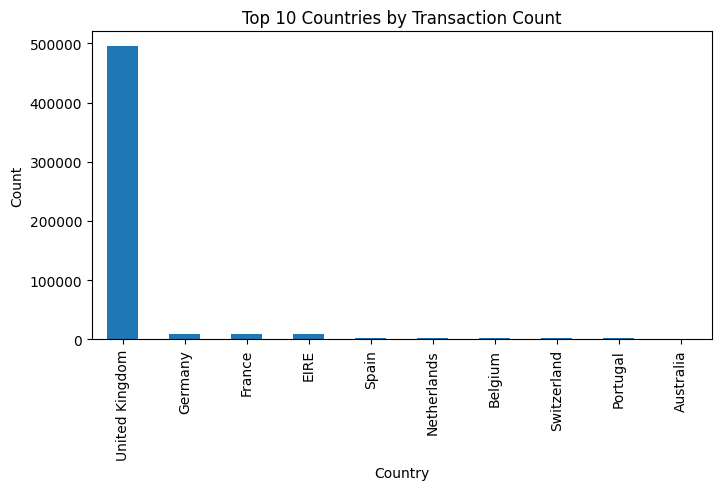

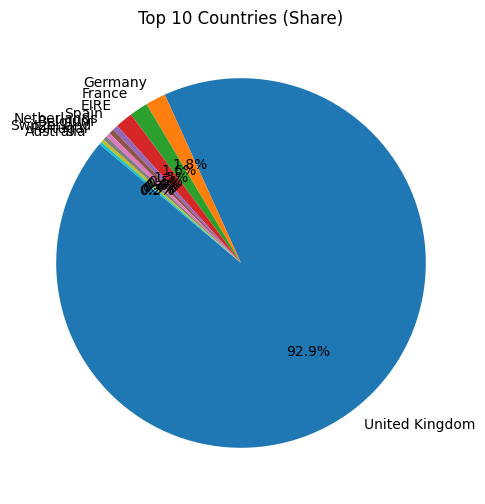

In [46]:
# 상위 10개 bar chart
country_top10 = country_summary.head(10)
country_top10['Count'].plot(kind='bar', figsize=(8,4), title='Top 10 Countries by Transaction Count')
plt.ylabel('Count'); plt.xlabel('Country'); plt.show()

# 전체 pie (국가 수가 많으면 top N만 추천)
plt.figure(figsize=(6,6))
country_top10['Count'].plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Countries (Share)'); plt.ylabel(''); plt.show()

반품(취소) 비율: 1.71%


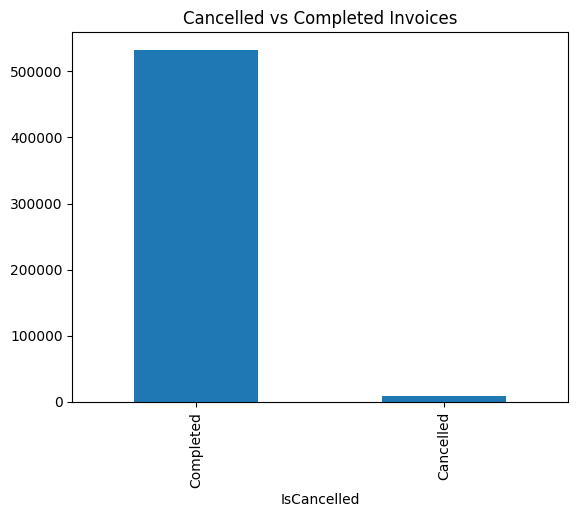

In [47]:
#InvoiceNo- 반품 여부 파악
df_org['IsCancelled'] = df_org['InvoiceNo'].str.startswith('C')
cancel_rate = df_org['IsCancelled'].mean() * 100
print(f"반품(취소) 비율: {cancel_rate:.2f}%")

cancel_summary = df_org['IsCancelled'].value_counts().rename({True: 'Cancelled', False: 'Completed'})
cancel_summary.plot(kind='bar', title='Cancelled vs Completed Invoices')
plt.show()

In [48]:
# TotalPrice 먼저 계산
df_org['TotalPrice'] = df_org['Quantity'] * df_org['UnitPrice']

country_sales = (
    df_org.groupby('Country')['TotalPrice'].sum()
      .sort_values(ascending=False)
      .to_frame(name='Sales')
)

# 누적 매출 비율로 파레토(상위20%가 매출 80%?) 확인
country_sales['CumPct'] = (country_sales['Sales'].cumsum() /
                           country_sales['Sales'].sum() * 100)

print(country_sales.head(10))          # 상위 10개 매출


                      Sales     CumPct
Country                               
United Kingdom  8187806.364  83.996903
Netherlands      284661.540  86.917183
EIRE             263276.820  89.618082
Germany          221698.210  91.892435
France           197403.900  93.917558
Australia        137077.270  95.323804
Switzerland       56385.350  95.902249
Spain             54774.580  96.464169
Belgium           40910.960  96.883865
Sweden            36595.910  97.259295


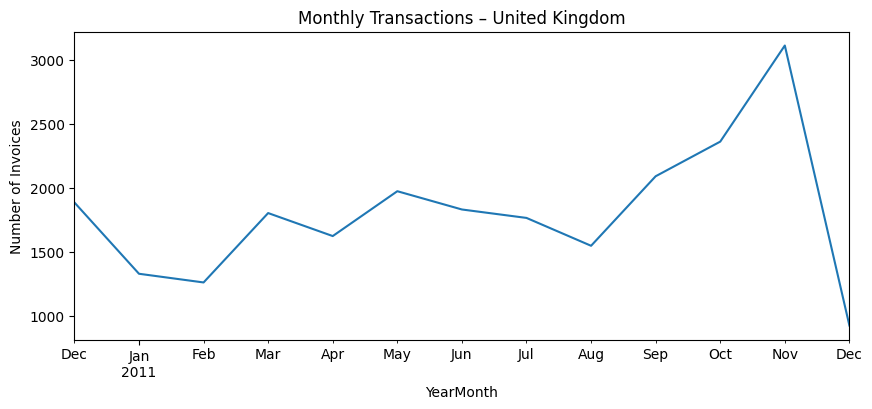

In [49]:
df_org['InvoiceDate'] = pd.to_datetime(df_org['InvoiceDate'])
df_org['YearMonth'] = df_org['InvoiceDate'].dt.to_period('M')

country_monthly = (
    df_org.groupby(['YearMonth', 'Country'])['InvoiceNo']
      .nunique()
      .unstack(fill_value=0)
)

# 영국(United Kingdom) 월별 거래 추이
country_monthly['United Kingdom'].plot(figsize=(10,4),
                                       title='Monthly Transactions – United Kingdom')
plt.ylabel('Number of Invoices'); plt.show()

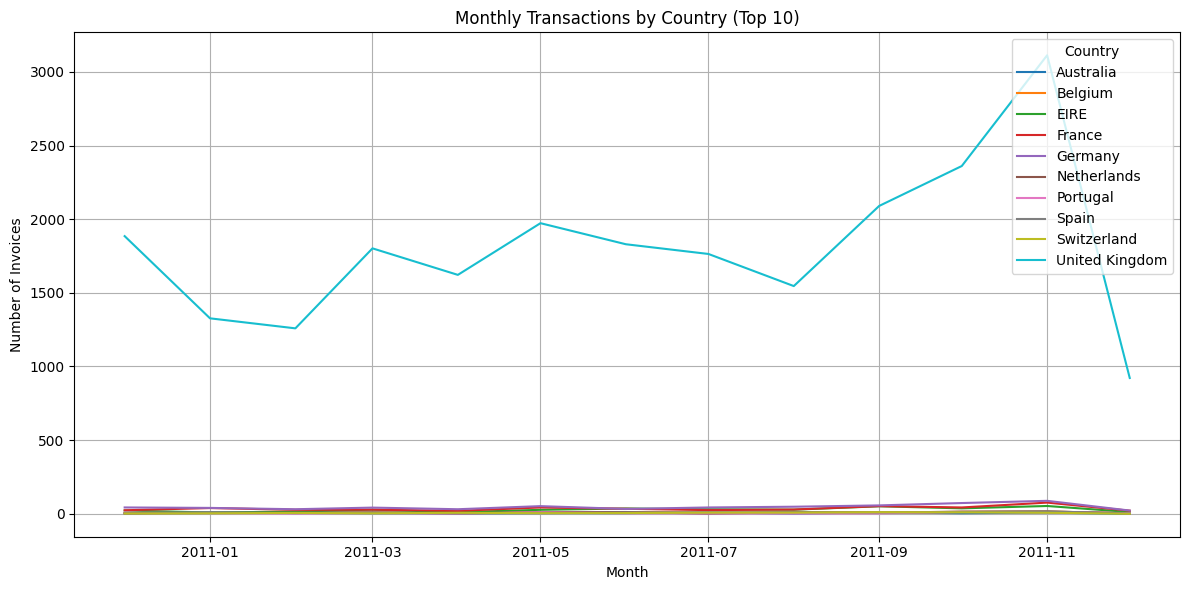

In [50]:
# 거래량 기준 상위 10개 국가 선정
top_countries = df_org['Country'].value_counts().head(10).index

# 월별 국가별 거래 수량 피벗 테이블 생성
country_monthly = (
    df_org[df_org['Country'].isin(top_countries)]
    .groupby(['YearMonth', 'Country'])['InvoiceNo']
    .nunique()
    .unstack(fill_value=0)
)

# 시각화
plt.figure(figsize=(12, 6))
for country in country_monthly.columns:
    plt.plot(country_monthly.index.to_timestamp(), country_monthly[country], label=country)

plt.title('Monthly Transactions by Country (Top 10)')
plt.xlabel('Month')
plt.ylabel('Number of Invoices')
plt.legend(title='Country')
plt.grid(True)
plt.tight_layout()
plt.show()

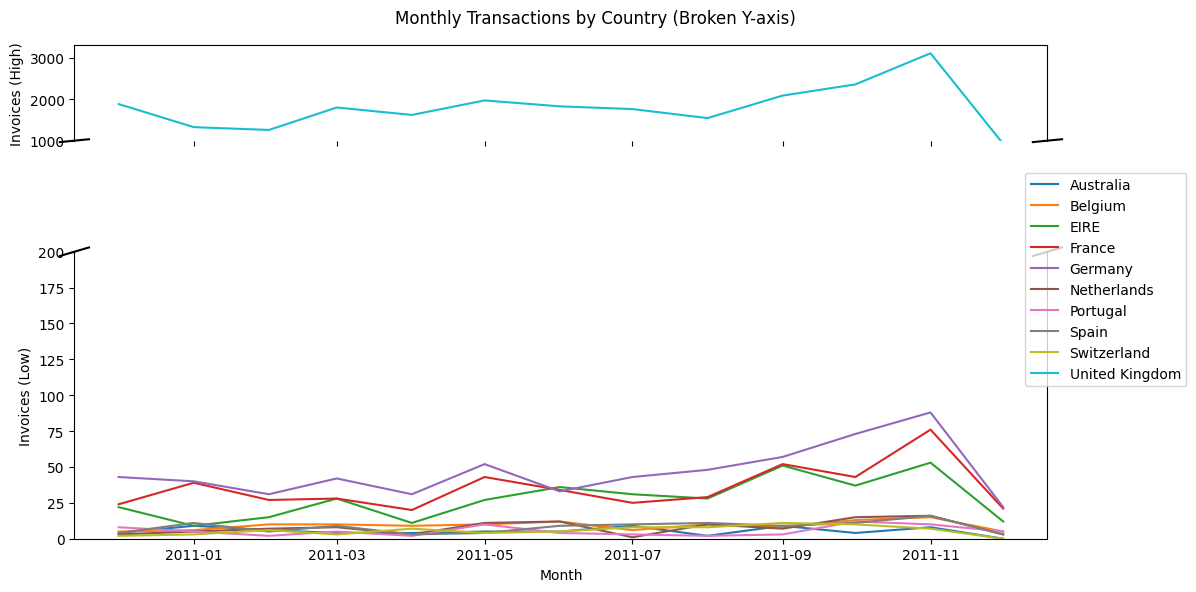

In [51]:
# figure와 2개의 서브플롯 (공유 x축)
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12, 6), gridspec_kw={'height_ratios': [1, 3]})

# 상단: 큰 값만 보여줌 (ex. United Kingdom 중심)
for country in country_monthly.columns:
    ax1.plot(country_monthly.index.to_timestamp(), country_monthly[country], label=country)

# 하단: 작은 값 위주로 확대
for country in country_monthly.columns:
    ax2.plot(country_monthly.index.to_timestamp(), country_monthly[country], label=country)

# y축 범위 설정 (위는 1000 이상만, 아래는 0~200)
ax1.set_ylim(1000, country_monthly.max().max() + 200)
ax2.set_ylim(0, 200)

# y축 물결 표시 (break 효과)
ax1.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax1.tick_params(labeltop=False)  # x축 상단 라벨 제거
ax2.xaxis.tick_bottom()

# 물결선 효과 그리기
d = .015  # break 크기
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((-d, +d), (-d, +d), **kwargs)        # 왼쪽 대각선
ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # 오른쪽 대각선

kwargs.update(transform=ax2.transAxes)  # 하단 축으로 전환
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # 왼쪽 대각선
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # 오른쪽 대각선

# 기타 설정
ax2.set_xlabel("Month")
ax1.set_ylabel("Invoices (High)")
ax2.set_ylabel("Invoices (Low)")
fig.suptitle("Monthly Transactions by Country (Broken Y-axis)")

plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1.3))
plt.tight_layout()
plt.show()

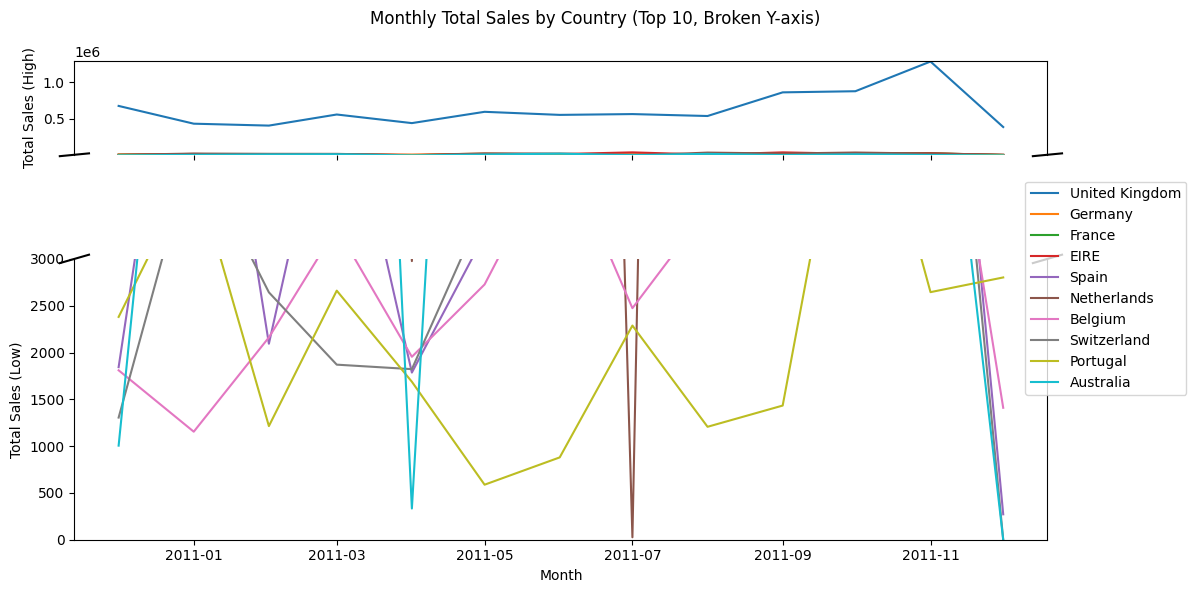

In [102]:
# 1. 전처리: 날짜 및 총 판매량 계산
df_org['InvoiceDate'] = pd.to_datetime(df_org['InvoiceDate'])
df_org['YearMonth'] = df_org['InvoiceDate'].dt.to_period('M')
df_org['TotalPrice'] = df_org['Quantity'] * df_org['UnitPrice']

# 2. 월별 국가별 총 판매량 계산
monthly_sales_by_country = (
    df_org.groupby(['YearMonth', 'Country'])['TotalPrice']
      .sum()
      .unstack(fill_value=0)
)

# 3. 거래량 상위 10개 국가만 추출
top10_countries_sales = df_org['Country'].value_counts().nlargest(10).index
monthly_sales_top10 = monthly_sales_by_country[top10_countries_sales]

# 4. broken y-axis 시각화
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12, 6), gridspec_kw={'height_ratios': [1, 3]})

# 상단: 큰 값
for country in monthly_sales_top10.columns:
    ax1.plot(monthly_sales_top10.index.to_timestamp(), monthly_sales_top10[country], label=country)

# 하단: 작은 값
for country in monthly_sales_top10.columns:
    ax2.plot(monthly_sales_top10.index.to_timestamp(), monthly_sales_top10[country], label=country)

# y축 범위 설정
ax1.set_ylim(10000, monthly_sales_top10.max().max() + 5000)  # 상단 범위
ax2.set_ylim(0, 3000)  # 하단 확대 범위

# y축 물결
ax1.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax1.tick_params(labeltop=False)
ax2.xaxis.tick_bottom()

d = .015  # break 표시
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((-d, +d), (-d, +d), **kwargs)
ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)
kwargs.update(transform=ax2.transAxes)
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)

# 라벨 및 제목
ax2.set_xlabel("Month")
ax1.set_ylabel("Total Sales (High)")
ax2.set_ylabel("Total Sales (Low)")
fig.suptitle("Monthly Total Sales by Country (Top 10, Broken Y-axis)")

plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1.3))
plt.tight_layout()
plt.show()

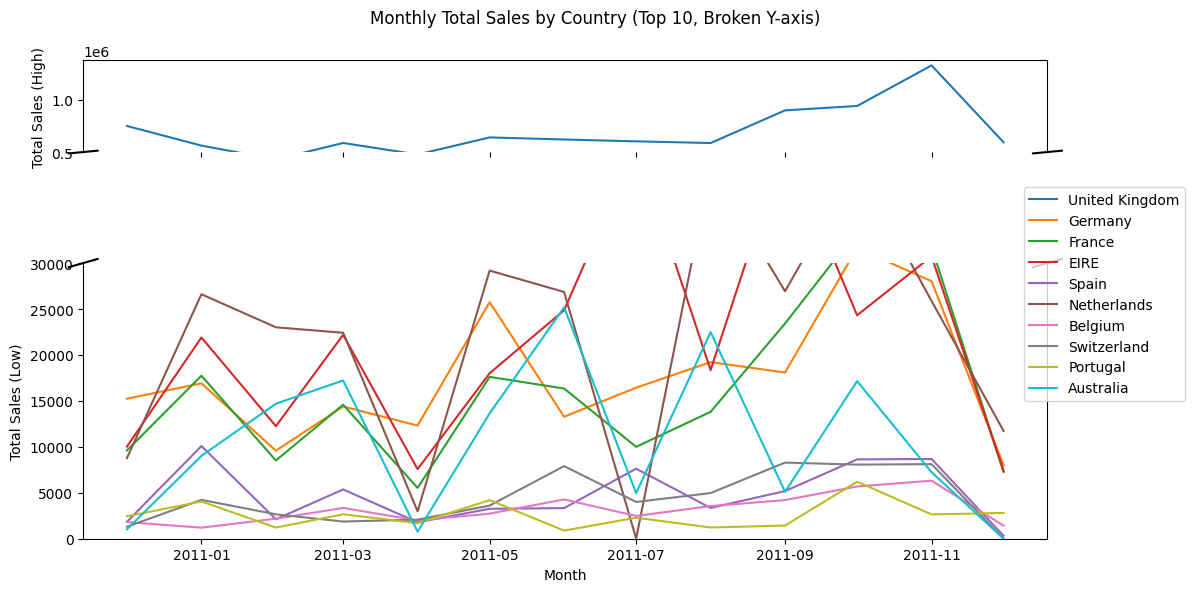

In [107]:
df_clean = df_org[df_org['Quantity'] > 0].copy()
df_clean['TotalPrice'] = df_clean['Quantity'] * df_clean['UnitPrice']

# 다시 월별 총매출 계산 (반품 제거된 데이터 기준)
df_clean['YearMonth'] = df_clean['InvoiceDate'].dt.to_period('M')
monthly_sales_by_country = (
    df_clean.groupby(['YearMonth', 'Country'])['TotalPrice']
            .sum()
            .unstack(fill_value=0)
)

# 거래 상위 10개 국가 선택
top10_countries = df_clean['Country'].value_counts().nlargest(10).index
monthly_sales_top10 = monthly_sales_by_country[top10_countries]

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12, 6), gridspec_kw={'height_ratios': [1, 3]})

# 상단 범위 (UK 등 고매출)
for country in monthly_sales_top10.columns:
    ax1.plot(monthly_sales_top10.index.to_timestamp(), monthly_sales_top10[country], label=country)

# 하단 범위 (나머지 국가 확대)
for country in monthly_sales_top10.columns:
    ax2.plot(monthly_sales_top10.index.to_timestamp(), monthly_sales_top10[country], label=country)

# y축 범위 조정
ax1.set_ylim(500000, monthly_sales_top10.max().max() + 50000)
ax2.set_ylim(0, 30000)

# y축 단절 표현
ax1.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax1.tick_params(labeltop=False)
ax2.xaxis.tick_bottom()

d = .015
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((-d, +d), (-d, +d), **kwargs)
ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)
kwargs.update(transform=ax2.transAxes)
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)

# 라벨
ax2.set_xlabel("Month")
ax1.set_ylabel("Total Sales (High)")
ax2.set_ylabel("Total Sales (Low)")
fig.suptitle("Monthly Total Sales by Country (Top 10, Broken Y-axis)")
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1.3))
plt.tight_layout()
plt.show()

In [106]:
#범주 별 구매 다양성
customer_variety = (
    df_org.groupby('CustomerID')['StockCode']
      .nunique()
      .to_frame(name='DistinctItems')
)

print(customer_variety['DistinctItems'].describe())

count    4372.000000
mean       61.211116
std        85.425119
min         1.000000
25%        15.000000
50%        35.000000
75%        77.000000
max      1794.000000
Name: DistinctItems, dtype: float64


### 2.2 데이터 형변

In [53]:
# 문자열 변수를 datetime 으로 변환
# df_org['InvoiceDate'] = pd.DatetimeIndex(df_org['InvoiceDate'])
# df_org.info()

## 3.NULL 값 처리
### 3.1 NULL 값 확인

In [54]:
# Null 값이 있는 전체 case 수 확인
df_org.isnull().sum().sum()

np.int64(136536)

In [55]:
# Null 값의 비율
df_org.isnull().sum().sum() / df_org.shape[0]

np.float64(0.2519537413108105)

In [56]:
# Null 값이 있는 변수 확인
df_org.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0
log_UnitPrice,2
IsCancelled,0


### Question
- CustomerID 가 Null인 경우가 정상일까?
- 만약 Null 인 경우가 정상이라면 분석에 사용할 수 있을까?

In [57]:
# CustomerID 가 Null 인 case  확인하기
df_org[df_org.CustomerID.isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,log_UnitPrice,IsCancelled,TotalPrice,YearMonth
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom,0.000000,False,0.00,2010-12
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom,1.255616,False,2.51,2010-12
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom,1.255616,False,5.02,2010-12
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom,0.615186,False,3.40,2010-12
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom,0.978326,False,3.32,2010-12
...,...,...,...,...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,NaN,United Kingdom,1.635106,False,20.65,2011-12
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,NaN,United Kingdom,1.635106,False,16.52,2011-12
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,NaN,United Kingdom,1.785070,False,4.96,2011-12
541539,581498,85174,S/4 CACTI CANDLES,1,2011-12-09 10:26:00,10.79,NaN,United Kingdom,2.467252,False,10.79,2011-12


### 3.2 NULL 값 처리 (삭제) 및 확인

In [58]:
df_na_treat =  df_org.dropna(axis = 0)

In [59]:
df_na_treat.isnull().sum().sum()

np.int64(0)

In [60]:
df_na_treat.shape

(406829, 12)

## 4. 데이터탐색 및 이상치 제거

### 4.1 이상치 확인

In [61]:
df_na_treat.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID,log_UnitPrice,TotalPrice
count,406829.000000,406829,406829.000000,406829.000000,406829.000000,406829.000000
mean,12.061303,2011-07-10 16:30:57.879207424,3.460471,15287.690570,1.161901,20.401854
min,-80995.000000,2010-12-01 08:26:00,0.000000,12346.000000,0.000000,-168469.600000
25%,2.000000,2011-04-06 15:02:00,1.250000,13953.000000,0.810930,4.200000
50%,5.000000,2011-07-31 11:48:00,1.950000,15152.000000,1.081805,11.100000
75%,12.000000,2011-10-20 13:06:00,3.750000,16791.000000,1.558145,19.500000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000,10.570573,168469.600000
std,248.693370,NaN,69.315162,1713.600303,0.610826,427.591718


In [62]:
# 이상치 케이스 확인
df_na_treat[(df_na_treat.Quantity == -80995) | (df_na_treat.Quantity == 80995) ]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,log_UnitPrice,IsCancelled,TotalPrice,YearMonth
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom,1.12493,False,168469.6,2011-12
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09 09:27:00,2.08,16446.0,United Kingdom,1.12493,True,-168469.6,2011-12


In [63]:
# Quantity 이상치 case 확인
df_na_treat[df_na_treat.Quantity <= 0 ].count()

,0
InvoiceNo,8905
StockCode,8905
Description,8905
Quantity,8905
InvoiceDate,8905
UnitPrice,8905
CustomerID,8905
Country,8905
log_UnitPrice,8905
IsCancelled,8905


In [64]:
# 음수값으로 시작하는 case는 InvocieNo 가 'C' 로 시작 하는 경우와 case 가 동일함
df_na_treat['InvoiceNo'].str.startswith("C").value_counts()

,count
InvoiceNo,
False,397924
True,8905


In [65]:
df_na_treat[(df_na_treat.Quantity <= 0) & (df_na_treat.InvoiceNo.str.startswith("C"))].shape

(8905, 12)

In [66]:
# UnitPirce 가 가장 큰 값도 환불 case 임
df_na_treat[df_na_treat.UnitPrice == 38970]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,log_UnitPrice,IsCancelled,TotalPrice,YearMonth
222681,C556445,M,Manual,-1,2011-06-10 15:31:00,38970.0,15098.0,United Kingdom,10.570573,True,-38970.0,2011-06


In [67]:
df_na_treat[df_na_treat.UnitPrice == 0].head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,log_UnitPrice,IsCancelled,TotalPrice,YearMonth
9302,537197,22841,ROUND CAKE TIN VINTAGE GREEN,1,2010-12-05 14:02:00,0.0,12647.0,Germany,0.0,False,0.0,2010-12
33576,539263,22580,ADVENT CALENDAR GINGHAM SACK,4,2010-12-16 14:36:00,0.0,16560.0,United Kingdom,0.0,False,0.0,2010-12
40089,539722,22423,REGENCY CAKESTAND 3 TIER,10,2010-12-21 13:45:00,0.0,14911.0,EIRE,0.0,False,0.0,2010-12
47068,540372,22090,PAPER BUNTING RETROSPOT,24,2011-01-06 16:41:00,0.0,13081.0,United Kingdom,0.0,False,0.0,2011-01
47070,540372,22553,PLASTERS IN TIN SKULLS,24,2011-01-06 16:41:00,0.0,13081.0,United Kingdom,0.0,False,0.0,2011-01
56674,541109,22168,ORGANISER WOOD ANTIQUE WHITE,1,2011-01-13 15:10:00,0.0,15107.0,United Kingdom,0.0,False,0.0,2011-01
86789,543599,84535B,FAIRY CAKES NOTEBOOK A6 SIZE,16,2011-02-10 13:08:00,0.0,17560.0,United Kingdom,0.0,False,0.0,2011-02
130188,547417,22062,CERAMIC BOWL WITH LOVE HEART DESIGN,36,2011-03-23 10:25:00,0.0,13239.0,United Kingdom,0.0,False,0.0,2011-03
139453,548318,22055,MINI CAKE STAND HANGING STRAWBERY,5,2011-03-30 12:45:00,0.0,13113.0,United Kingdom,0.0,False,0.0,2011-03
145208,548871,22162,HEART GARLAND RUSTIC PADDED,2,2011-04-04 14:42:00,0.0,14410.0,United Kingdom,0.0,False,0.0,2011-04


### 4.2 EDA


In [68]:
# 연속형 변수의 대략적인 분포 확인

df_na_treat.describe()

# 확인 필요한 부분
## 1. Quantity 음수와 매우 큰수가 있다.
## 2. 가격의 max 값이 너무 크다 이상치일 가능성이 있다.


,Quantity,InvoiceDate,UnitPrice,CustomerID,log_UnitPrice,TotalPrice
count,406829.000000,406829,406829.000000,406829.000000,406829.000000,406829.000000
mean,12.061303,2011-07-10 16:30:57.879207424,3.460471,15287.690570,1.161901,20.401854
min,-80995.000000,2010-12-01 08:26:00,0.000000,12346.000000,0.000000,-168469.600000
25%,2.000000,2011-04-06 15:02:00,1.250000,13953.000000,0.810930,4.200000
50%,5.000000,2011-07-31 11:48:00,1.950000,15152.000000,1.081805,11.100000
75%,12.000000,2011-10-20 13:06:00,3.750000,16791.000000,1.558145,19.500000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000,10.570573,168469.600000
std,248.693370,NaN,69.315162,1713.600303,0.610826,427.591718


### Quantity

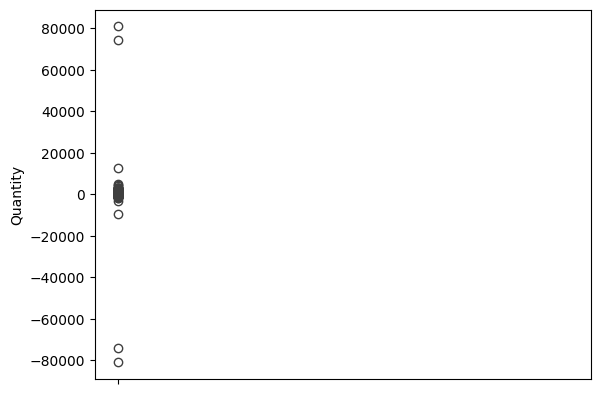

In [69]:
sns.boxplot(df_na_treat['Quantity'])
plt.xlim(-10,200)
plt.show()

In [70]:
df_na_treat['Quantity'].quantile(q=0.99,  interpolation='nearest')

np.int64(120)

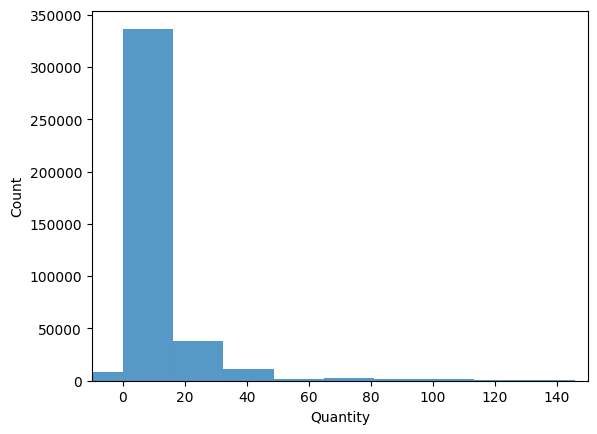

In [71]:
sns.histplot(df_na_treat['Quantity'], bins = 10000, kde= False) #kde=True 이면 커널 밀도도 함께 그림
plt.xlim(-10,150)
plt.show()

#### UnitPrice

<Axes: ylabel='UnitPrice'>

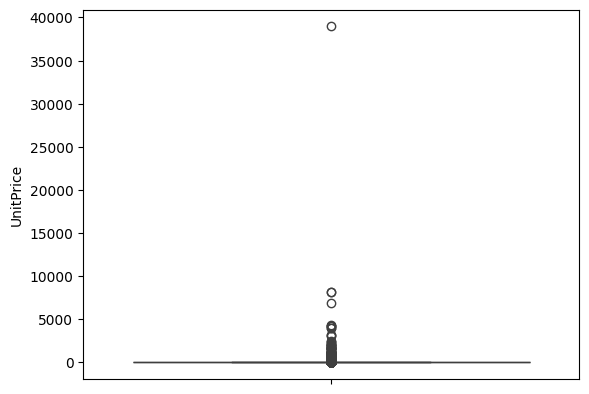

In [72]:
sns.boxplot(df_na_treat['UnitPrice'])

(-10.0, 100.0)

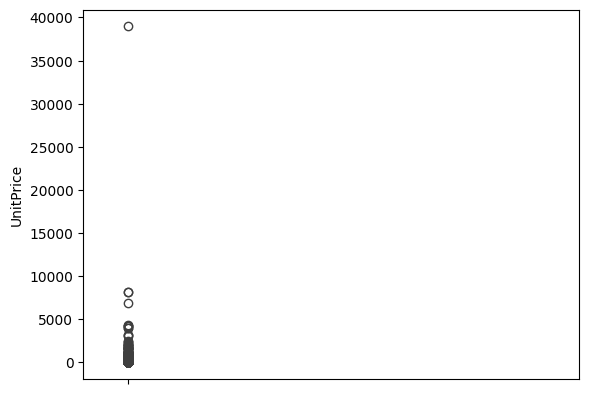

In [73]:
sns.boxplot(df_na_treat['UnitPrice'])
plt.xlim(-10,100)

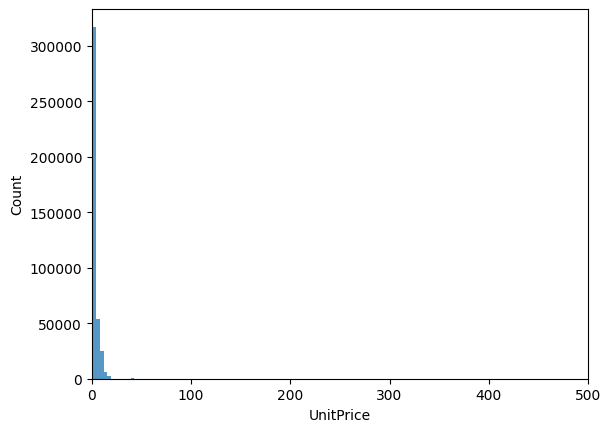

In [74]:
sns.histplot(df_na_treat['UnitPrice'], kde = False, bins =10000)
plt.xlim(0,500)
plt.show()

In [75]:
#  어떤 데이터인지 case 확인
df_na_treat[df_na_treat.UnitPrice >= 1000]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,log_UnitPrice,IsCancelled,TotalPrice,YearMonth
45622,C540271,M,Manual,-1,2011-01-06 11:51:00,1126.00,12503.0,Spain,7.027315,True,-1126.00,2011-01
73446,C542348,M,Manual,-1,2011-01-27 12:09:00,1715.85,12539.0,Spain,7.448246,True,-1715.85,2011-01
117052,C546325,M,Manual,-1,2011-03-11 10:15:00,1687.17,14911.0,EIRE,7.431400,True,-1687.17,2011-03
117053,C546327,M,Manual,-1,2011-03-11 10:18:00,1687.17,14911.0,EIRE,7.431400,True,-1687.17,2011-03
117054,546328,M,Manual,1,2011-03-11 10:19:00,1687.17,14911.0,EIRE,7.431400,False,1687.17,2011-03
117055,546329,M,Manual,1,2011-03-11 10:22:00,1687.17,14911.0,EIRE,7.431400,False,1687.17,2011-03
144826,548813,M,Manual,1,2011-04-04 13:03:00,2382.92,12744.0,Singapore,7.776501,False,2382.92,2011-04
144828,548813,M,Manual,1,2011-04-04 13:03:00,1252.95,12744.0,Singapore,7.134054,False,1252.95,2011-04
144829,548820,M,Manual,1,2011-04-04 13:04:00,2053.07,12744.0,Singapore,7.627578,False,2053.07,2011-04
144831,C548830,M,Manual,-1,2011-04-04 13:08:00,2382.92,12744.0,Singapore,7.776501,True,-2382.92,2011-04


In [76]:
# 값이 1000 이상인 case 갯수 확인
df_na_treat[df_na_treat.UnitPrice >= 1000].shape

(46, 12)

#### InvoiceDate

In [77]:
print(pd.DatetimeIndex(df_na_treat['InvoiceDate']).min())
print(pd.DatetimeIndex(df_na_treat['InvoiceDate']).max())
print(pd.DatetimeIndex(df_na_treat['InvoiceDate']).to_period('D').value_counts().head(20))


2010-12-01 08:26:00
2011-12-09 12:50:00
InvoiceDate
2011-11-06    3434
2011-12-05    3398
2011-11-23    3332
2011-11-10    3194
2011-11-20    3112
2011-11-17    3034
2011-11-14    2964
2011-10-30    2907
2011-10-06    2870
2011-11-22    2862
2011-11-28    2789
2011-10-10    2783
2011-11-16    2772
2011-11-13    2757
2011-11-29    2736
2010-12-05    2724
2011-12-06    2654
2011-12-08    2599
2011-11-04    2571
2011-09-22    2505
Freq: D, Name: count, dtype: int64


In [78]:
pd.DatetimeIndex(df_na_treat['InvoiceDate']).to_period('M').value_counts()

,count
InvoiceDate,
2011-11,65598
2011-10,50695
2011-09,40822
2011-05,28908
2011-06,27836
2011-03,27822
2011-08,27662
2011-07,27502
2010-12,26850


In [79]:
df_na_treat['Country'].value_counts()
# df_na_treat['Country'].value_counts().sum()

,count
Country,
United Kingdom,361878
Germany,9495
France,8491
EIRE,7485
Spain,2533
Netherlands,2371
Belgium,2069
Switzerland,1877
Portugal,1480


#### InvoiceDate

In [80]:
df_na_treat

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,log_UnitPrice,IsCancelled,TotalPrice,YearMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,1.266948,False,15.30,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1.479329,False,20.34,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,1.321756,False,22.00,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1.479329,False,20.34,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1.479329,False,20.34,2010-12
...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,0.615186,False,10.20,2011-12
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,1.131402,False,12.60,2011-12
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,1.638997,False,16.60,2011-12
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,1.638997,False,16.60,2011-12


In [81]:
df_na_treat.groupby(['StockCode','Description']).size().sort_values(ascending=False).head(10)

,,0
StockCode,Description,
85123A,WHITE HANGING HEART T-LIGHT HOLDER,2070
22423,REGENCY CAKESTAND 3 TIER,1905
85099B,JUMBO BAG RED RETROSPOT,1662
84879,ASSORTED COLOUR BIRD ORNAMENT,1418
47566,PARTY BUNTING,1416
20725,LUNCH BAG RED RETROSPOT,1358
22720,SET OF 3 CAKE TINS PANTRY DESIGN,1232
POST,POSTAGE,1196
20727,LUNCH BAG BLACK SKULL.,1126


In [82]:
df_na_treat.duplicated().sum()

np.int64(5225)

## 4.3 데이터 cleansing
 1. 환불 제거
 2. 무료구매인건 제거  
 3. CustomerId NULL 제거
 4. 중복 데이터 제

In [83]:
df_outlier_treat = df_na_treat[(df_na_treat.Quantity > 0) & (df_na_treat.UnitPrice != 0) & (~df_na_treat.CustomerID.isnull()) ]
df_outlier_treat = df_outlier_treat[~df_outlier_treat.duplicated()]
df_outlier_treat.shape

(392692, 12)

## 4.4 유저단위 스코어링을 위해 데이터 요약
1. 구매 건수 계산을 위해 CustomerId, InvoiceNo 별로 요약

---



<Axes: ylabel='Count'>

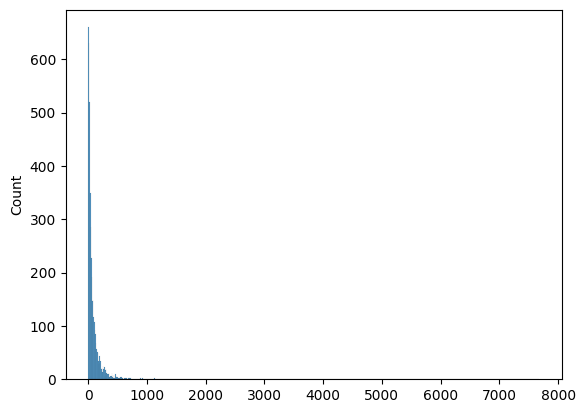

In [115]:
# df_na_treat.groupby(['StockCode','Description']).size().sort_values(ascending=False).head(10)

# temp_frequecy = df_outlier_treat.groupby(['CustomerID']).InvoiceNo.nunique()
temp_frequecy = df_outlier_treat.groupby(['CustomerID']).size()
temp_frequecy.head()
sns.histplot(temp_frequecy)

In [85]:
#
temp_frequecy.to_frame()
df_frequecy = temp_frequecy.reset_index().rename(columns = {'index' :'CustomerID'})
df_frequecy.columns = ['CustomerID','frequecy']
df_frequecy

,CustomerID,frequecy
0,12346.0,1
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17
...,...,...
4333,18280.0,10
4334,18281.0,7
4335,18282.0,12
4336,18283.0,721


2. 유저별 구매금액 생성


/tmp/ipython-input-86-4106981131.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(temp_monitery)


<Axes: xlabel='monitery', ylabel='Density'>

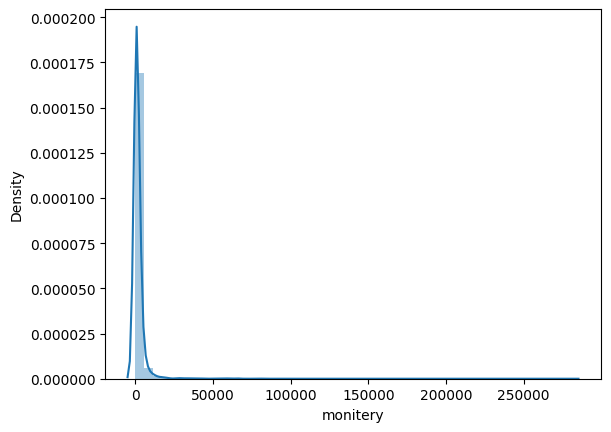

In [86]:
temp = df_outlier_treat[['CustomerID','Quantity','UnitPrice']].copy()
temp['monitery'] = temp['Quantity'] * temp['UnitPrice']
temp_monitery = temp.groupby(['CustomerID']).monitery.sum()
temp_monitery.head()
sns.distplot(temp_monitery)

In [87]:
df_monitery = temp_monitery.to_frame()
df_monitery = df_monitery.reset_index().rename(columns = {'index' :'CustomerID'})
df_monitery

,CustomerID,monitery
0,12346.0,77183.60
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40
...,...,...
4333,18280.0,180.60
4334,18281.0,80.82
4335,18282.0,178.05
4336,18283.0,2045.53


3.유저별 최근 거래 생성
 - 오늘을 2011-12-10일 로 가정  

In [88]:
# pd.DatetimeIndex(df_na_treat['InvoiceDate']).to_period('D') -""
temp2 = df_outlier_treat[['CustomerID','InvoiceDate']].copy()
temp2['today'] ="2011-12-10"

temp2['diff_days'] = (pd.to_datetime(temp2['today']) - pd.to_datetime(temp2['InvoiceDate'])).dt.days
recency = temp2.groupby('CustomerID').diff_days.min()
recency

,diff_days
CustomerID,
12346.0,325
12347.0,2
12348.0,75
12349.0,18
12350.0,310
...,...
18280.0,277
18281.0,180
18282.0,7


In [89]:
df_recency = recency.to_frame()
df_recency = df_recency.reset_index().rename(columns = {'index' :'CustomerID', 'diff_days' :'recency'})
df_recency

,CustomerID,recency
0,12346.0,325
1,12347.0,2
2,12348.0,75
3,12349.0,18
4,12350.0,310
...,...,...
4333,18280.0,277
4334,18281.0,180
4335,18282.0,7
4336,18283.0,3


In [90]:
rfm = pd.merge(df_frequecy, df_recency, how = 'inner', on ='CustomerID')


In [91]:
RFM_data = pd.merge(rfm, df_monitery, how ='inner', on= 'CustomerID')
RFM_data

,CustomerID,frequecy,recency,monitery
0,12346.0,1,325,77183.60
1,12347.0,182,2,4310.00
2,12348.0,31,75,1797.24
3,12349.0,73,18,1757.55
4,12350.0,17,310,334.40
...,...,...,...,...
4333,18280.0,10,277,180.60
4334,18281.0,7,180,80.82
4335,18282.0,12,7,178.05
4336,18283.0,721,3,2045.53


<Axes: xlabel='total_score'>

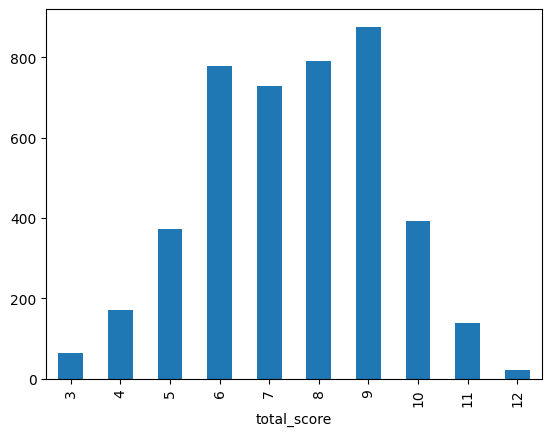

In [92]:
RFM_data['fre_score'] = pd.qcut(RFM_data['frequecy'],4, labels =[1,2,3,4])
RFM_data['rec_score'] = pd.qcut(RFM_data['recency'],4, labels =[1,2,3,4])
RFM_data['mon_score'] = pd.qcut(RFM_data['monitery'],4, labels =[1,2,3,4])
RFM_data['total_score'] = RFM_data['fre_score'].astype(int) + RFM_data['rec_score'].astype(int) + RFM_data['mon_score'].astype(int)
RFM_data['total_score'].value_counts().sort_index().plot(kind='bar')

In [93]:
RFM_data.head()

,CustomerID,frequecy,recency,monitery,fre_score,rec_score,mon_score,total_score
0,12346.0,1,325,77183.60,1,4,4,9
1,12347.0,182,2,4310.00,4,1,4,9
2,12348.0,31,75,1797.24,2,3,4,9
3,12349.0,73,18,1757.55,3,2,4,9
4,12350.0,17,310,334.40,1,4,2,7


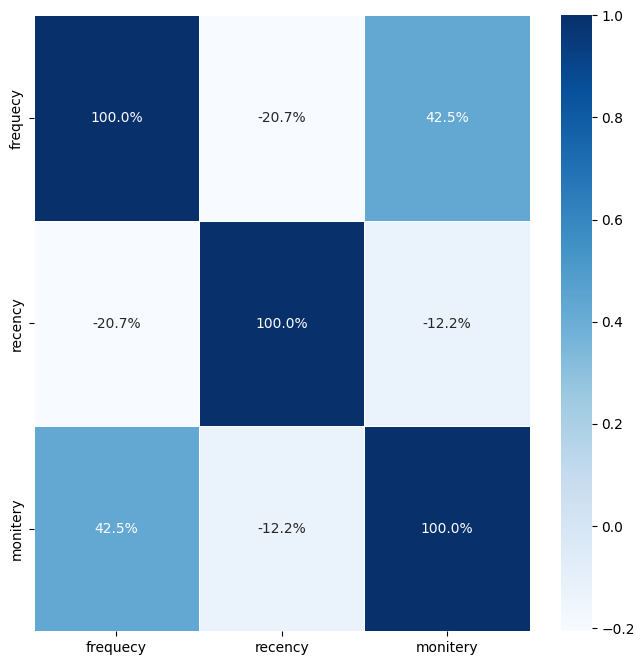

In [94]:
plt.figure(figsize =(8,8))
sns.heatmap(data = RFM_data[['frequecy','recency','monitery']].corr(),annot= True,
            fmt ='.1%', linewidths =.5, cmap='Blues')
plt.show()

In [95]:
df_count_pivot = RFM_data[['rec_score', 'mon_score']].value_counts(sort= False,normalize=True).sort_index().to_frame().unstack()
df_count_pivot

proportion                              
mon_score          1         2         3         4
rec_score                                         
1           0.024666  0.036192  0.066851  0.126556
2           0.047026  0.059244  0.072153  0.068926
3           0.059474  0.070078  0.076072  0.042646
4           0.118949  0.084371  0.034809  0.011987

<Axes: xlabel='None-mon_score', ylabel='rec_score'>

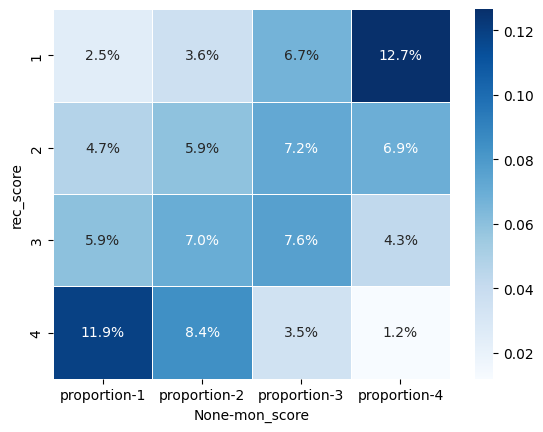

In [96]:
sns.heatmap(df_count_pivot, annot= True, fmt ='.1%', linewidths =.5, cmap='Blues')

In [97]:
# 전체 데이터 수 확인
df_org.shape

(541909, 12)

In [98]:
temp2 = df_outlier_treat[['CustomerID','Country']]
temp2.groupby(['CustomerID','Country']).count()
temp2

,CustomerID,Country
0,17850.0,United Kingdom
1,17850.0,United Kingdom
2,17850.0,United Kingdom
3,17850.0,United Kingdom
4,17850.0,United Kingdom
...,...,...
541904,12680.0,France
541905,12680.0,France
541906,12680.0,France
541907,12680.0,France


In [99]:
RFM_data.CustomerID.nunique()

4338

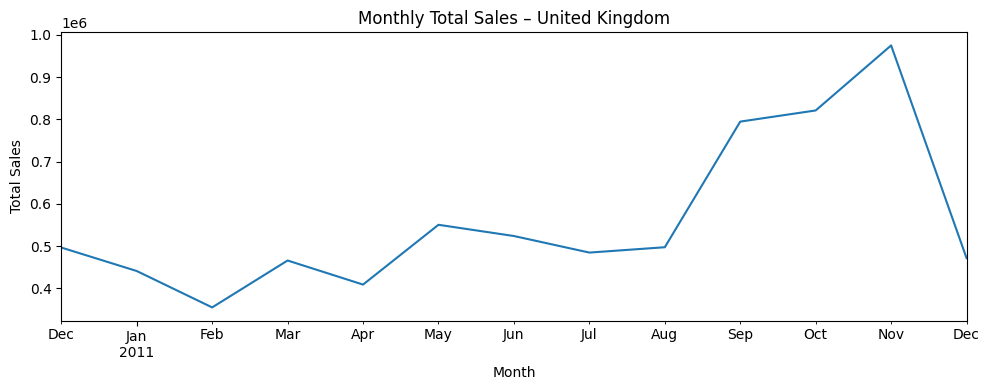

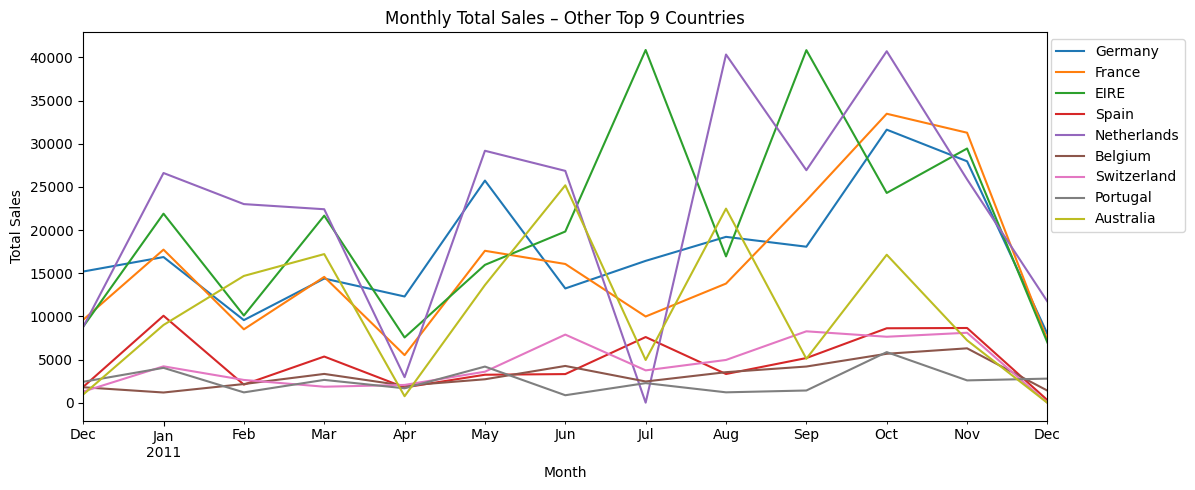

In [109]:
# ✅ 전처리: 반품 제거 및 TotalPrice 컬럼 생성
df_outlier_treat_clean = df_outlier_treat[df_outlier_treat['Quantity'] > 0].copy()
df_outlier_treat_clean['TotalPrice'] = df_outlier_treat_clean['Quantity'] * df_outlier_treat_clean['UnitPrice']

# ✅ 날짜 타입 처리 및 월 단위로 변환
df_outlier_treat_clean['InvoiceDate'] = pd.to_datetime(df_outlier_treat_clean['InvoiceDate'])
df_outlier_treat_clean['YearMonth'] = df_outlier_treat_clean['InvoiceDate'].dt.to_period('M')

# ✅ 월별 국가별 총매출
monthly_sales_by_country = (
    df_outlier_treat_clean.groupby(['YearMonth', 'Country'])['TotalPrice']
                     .sum()
                     .unstack(fill_value=0)
)

# ✅ 거래량 기준 상위 10개 국가 선택
top10_countries = df_outlier_treat_clean['Country'].value_counts().nlargest(10).index
monthly_sales_top10 = monthly_sales_by_country[top10_countries]

# ✅ 영국 (UK) 그래프
plt.figure(figsize=(10, 4))
monthly_sales_top10['United Kingdom'].plot()
plt.title('Monthly Total Sales – United Kingdom')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()

# ✅ 나머지 9개 국가 그래프
other_9 = [c for c in top10_countries if c != 'United Kingdom']
monthly_sales_top10[other_9].plot(figsize=(12, 5))
plt.title('Monthly Total Sales – Other Top 9 Countries')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.tight_layout()
plt.show()

In [110]:
df_outlier_treat_clean.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,log_UnitPrice,IsCancelled,TotalPrice,YearMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,1.266948,False,15.30,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1.479329,False,20.34,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,1.321756,False,22.00,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1.479329,False,20.34,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1.479329,False,20.34,2010-12


/tmp/ipython-input-113-248581981.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_outlier_treat_clean[df_org['Country'].isin(top_countries)]


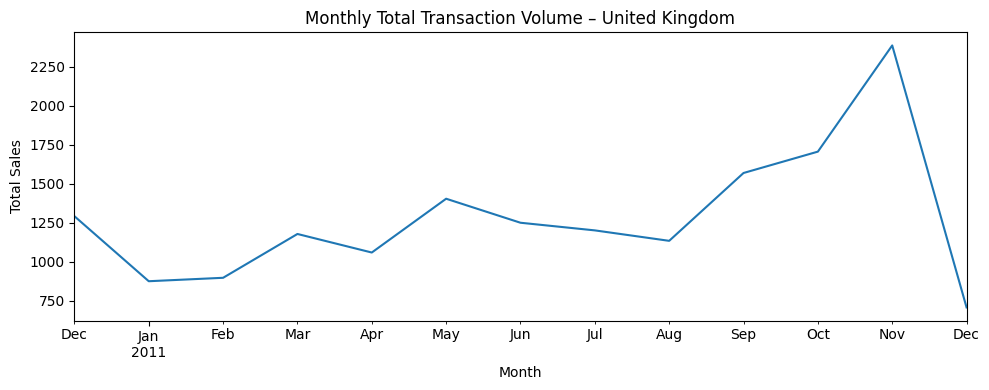

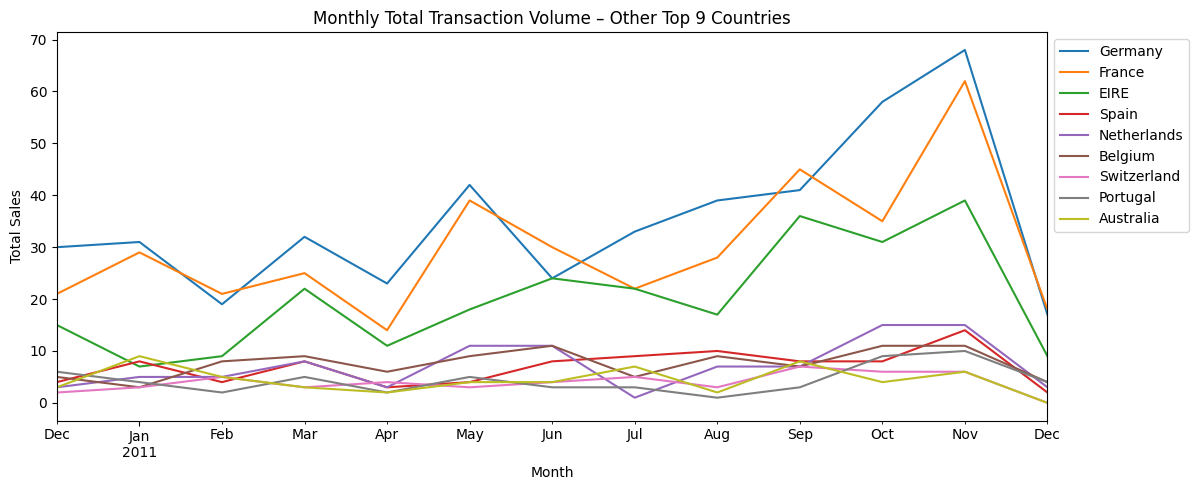

In [113]:
# 거래량 기준 상위 10개 국가 선정
top_countries = df_outlier_treat_clean['Country'].value_counts().head(10).index

# 월별 국가별 거래 수량 피벗 테이블 생성
country_monthly = (
    df_outlier_treat_clean[df_org['Country'].isin(top_countries)]
    .groupby(['YearMonth', 'Country'])['InvoiceNo']
    .nunique()
    .unstack(fill_value=0)
)
monthly_top10 = country_monthly[top_countries]

# ✅ 영국 (UK) 그래프
plt.figure(figsize=(10, 4))
monthly_top10['United Kingdom'].plot()
plt.title('Monthly Total Transaction Volume – United Kingdom')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()

# ✅ 나머지 9개 국가 그래프
other_9 = [c for c in top_countries if c != 'United Kingdom']
monthly_top10[other_9].plot(figsize=(12, 5))
plt.title('Monthly Total Transaction Volume – Other Top 9 Countries')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.tight_layout()
plt.show()